# Домашнее задание по теме: выбросы (outliers)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.1'

In [5]:
import seaborn as sns

sns.__version__

'0.11.1'

In [6]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [8]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('hotels/hotel_bookings.csv')

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Графическое представление выбросов

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. С помощью `boxplot` (пакет `seaborn`) показать, где имеются выбросы. Можно реализовать это любым удобным способом.

1. Сделать выводы по этим изображениям: 
    - Есть ли выбросы?
    - Если есть, то в каких колонках?

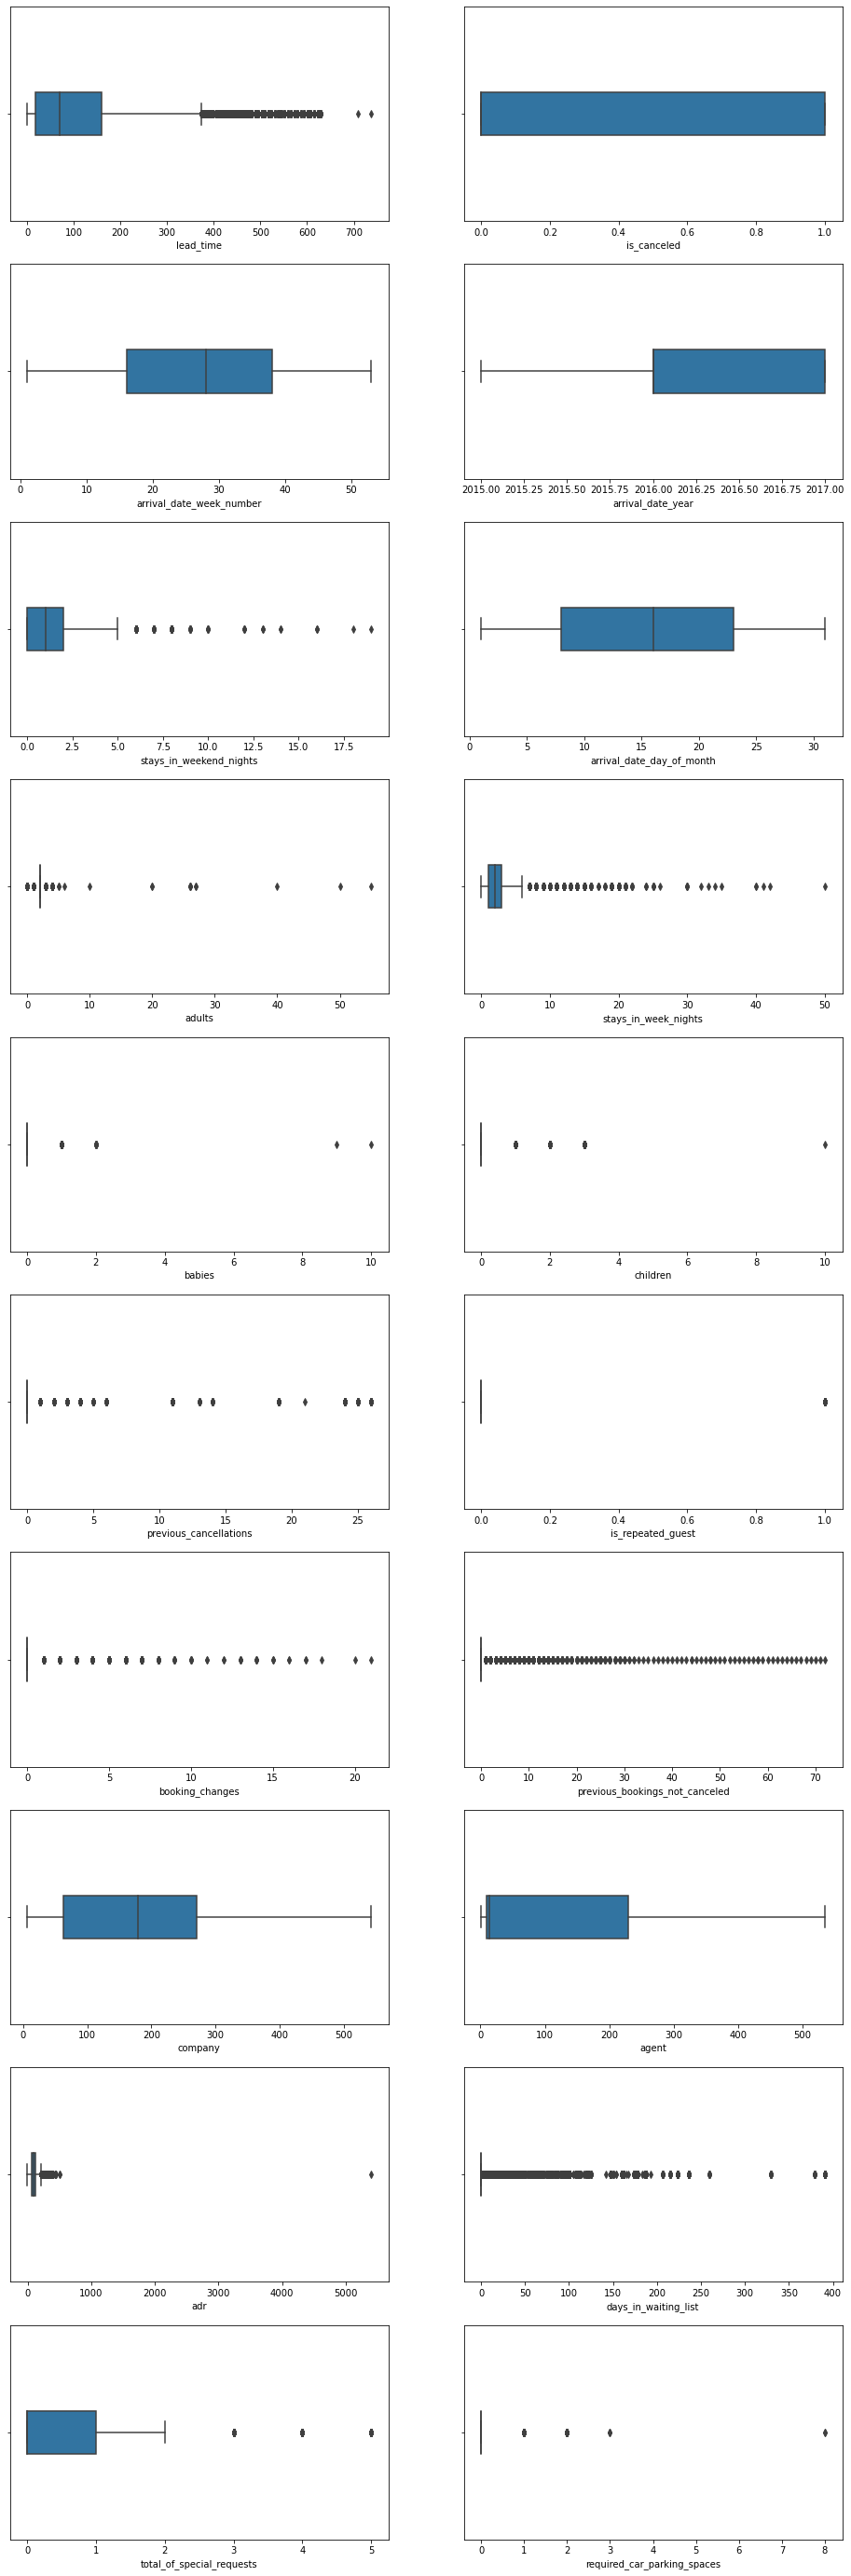

In [76]:
import matplotlib
import matplotlib.pyplot as plt

df_num_columns = df.select_dtypes(include=np.number).columns.tolist()

fig, axs = plt.subplots(int(len(df_num_columns)/2), 2, figsize=(16, 50))

for index, column_name in enumerate(df_num_columns):
    sns.boxplot(x=df[column_name], width=0.2, ax=axs[int(index/2)][int(index%2==0)])

Выбросы присутствуют в колонках:
`lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, days_in_waiting_list, adr, total_of_special_requests`

## Обнаружение и удаление выбросов

### Способ основанный на межквартильном расстоянии (Interquartile range = IQR, Tukey's fences)

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. Выбрать одну или несколько колонок содержащих выбросы.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено.

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

<AxesSubplot:xlabel='total_of_special_requests'>

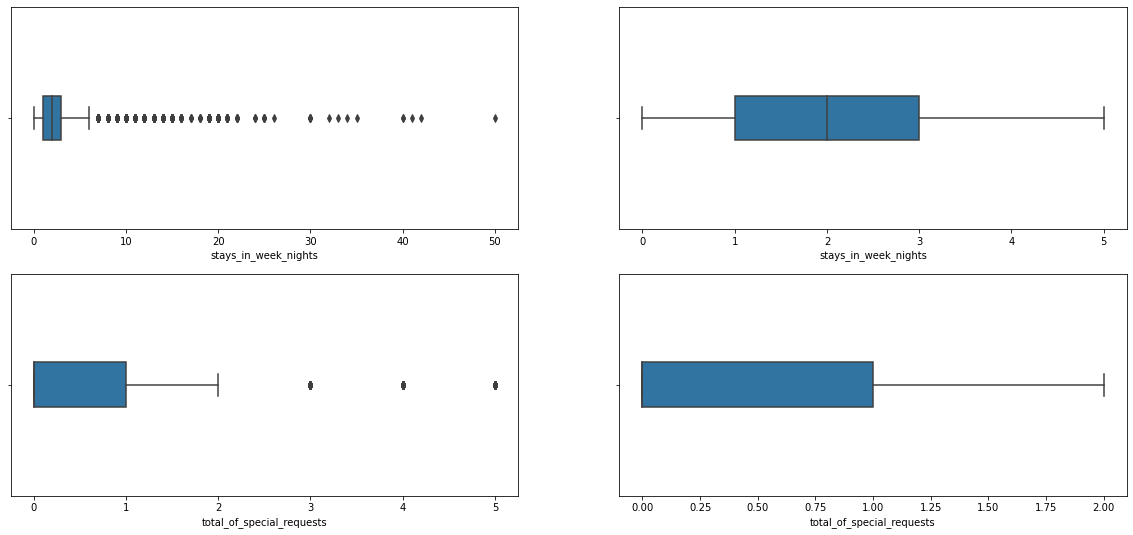

In [171]:
def tukeys_fences_method(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return data[lambda x: ((x > lower_fence) & (x < upper_fence))]

stays_in_week_nights_tukeys_fences = tukeys_fences_method(df.stays_in_week_nights)
total_of_special_requests_tukeys_fences = tukeys_fences_method(df.total_of_special_requests)

fig, axs = plt.subplots(2, 2, figsize=(20, 9))

sns.boxplot(x=df.stays_in_week_nights, width=0.2, ax=axs[0][0])
sns.boxplot(x=stays_in_week_nights_tukeys_fences, width=0.2, ax=axs[0][1])
sns.boxplot(x=df.total_of_special_requests, width=0.2, ax=axs[1][0])
sns.boxplot(x=total_of_special_requests_tukeys_fences, width=0.2, ax=axs[1][1])

In [159]:
# stays_in_week_nights:
# На графике видно, что метод эффективно справился с выбросами, удалив все значения больше верхнего порога
# Удалено:
len(df.stays_in_week_nights) - len(df_stays_in_week_nights_without_outliers)

4853

In [158]:
# total_of_special_requests:
# На графике видно, что метод эффективно справился с выбросами, удалив все значения больше верхнего порога
# Удалено:
len(df.total_of_special_requests) - len(df_total_of_special_requests_without_outliers)

2877

### Способ основанный на Z-оценке (z-score)

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. Выбрать одну или несколько колонок содержащих выбросы. Можно использовать те, что были в IQR-способе.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено. Это больше или меньше, чем способом IQR?

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

<AxesSubplot:xlabel='total_of_special_requests'>

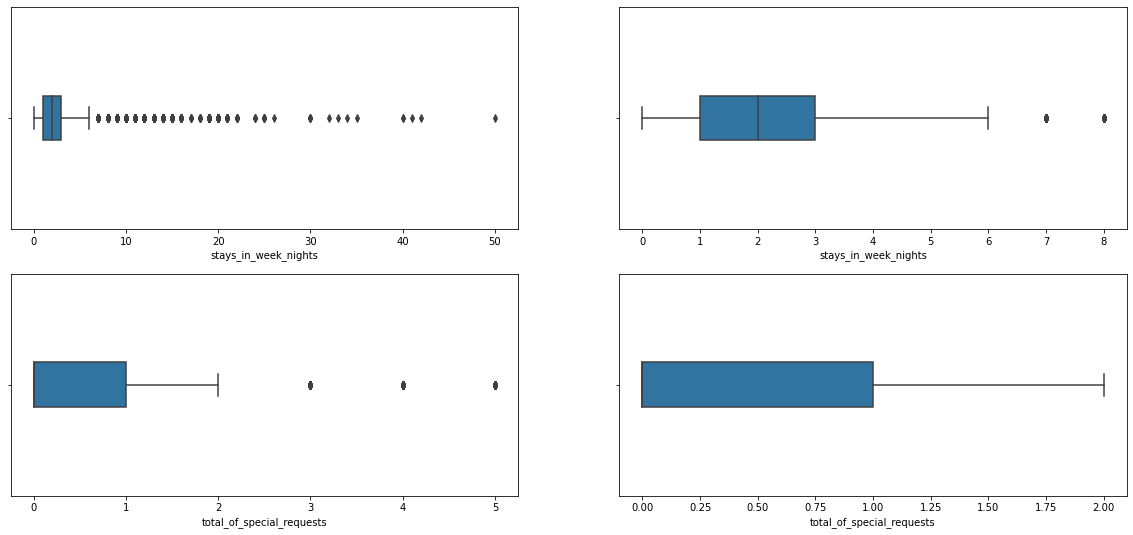

In [170]:
def z_score_method(data):
    z_abs = np.abs(stats.zscore(data))
    z_threshold = 3
    return data[z_abs < z_threshold]

stays_in_week_nights_z_score = z_score_method(df.stays_in_week_nights)
total_of_special_requests_z_score = z_score_method(df.total_of_special_requests)

fig, axs = plt.subplots(2, 2, figsize=(20, 9))

sns.boxplot(x=df.stays_in_week_nights, width=0.2, ax=axs[0][0])
sns.boxplot(x=stays_in_week_nights_z_score, width=0.2, ax=axs[0][1])
sns.boxplot(x=df.total_of_special_requests, width=0.2, ax=axs[1][0])
sns.boxplot(x=total_of_special_requests_z_score, width=0.2, ax=axs[1][1])

In [172]:
# stays_in_week_nights:
# На графике видно, что метод эффективно справился с выбросами, не посчитав при этом несколько значений выбросами (7, 8), 
# которые были выявлены как выбросы методом, основанным на межквартильном расстоянии
# Удалено:
len(df.stays_in_week_nights) - len(stays_in_week_nights_z_score)

1669

In [174]:
# total_of_special_requests:
# На графике видно, что метод эффективно справился с выбросами, удалив столько же значений, сколько было удалено методом, 
# основанным на межквартильном расстоянии
# Удалено:
len(df.total_of_special_requests) - len(total_of_special_requests_z_score)

2877